In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [12]:
df = pd.read_csv("scores.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,0,1,1,0,1.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,1,1,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,1,1,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,61.000000,61.000000,61.000000,61.000000,61.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.901639,0.786885,0.885246,0.836066,0.672131,0.913043,0.652174,0.695652,0.869565,0.695652,...,0.236842,0.684211,0.868421,0.763158,0.763158,0.552632,0.684211,0.710526,0.815789,0.684211
std,0.300273,0.412907,0.321370,0.373288,0.473333,0.288104,0.486985,0.470472,0.344350,0.470472,...,0.430851,0.471069,0.342570,0.430851,0.430851,0.503897,0.471069,0.459606,0.392859,0.471069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.loc[0,24] == np.nan

np.False_

In [24]:
a = df.to_numpy().astype(int)
a.shape


C:\Users\yongduek\AppData\Local\Temp\ipykernel_8068\2561074914.py:1: RuntimeWarning: invalid value encountered in cast
  a = df.to_numpy().astype(int)


(61, 25)

In [35]:
d = []
for c in range(a.shape[1]):
    for r in range(a.shape[0]):
        st_id = r + 1  # 1-based index
        item_id = c + 1
        if a[r,c] == 0 or a[r,c] == 1:
            d.append( [st_id, item_id, int(a[r,c])])
            pass
        else:
            # print(a[r,c])
            pass
#

In [37]:
da = np.array(d)

In [40]:
da.T

array([[ 1,  2,  3, ..., 59, 60, 61],
       [ 1,  1,  1, ..., 25, 25, 25],
       [ 1,  1,  1, ...,  0,  1,  0]])

In [33]:
da.shape

(915, 3)

In [48]:
daf = pd.DataFrame(da, columns=["person.id", "item.id", "response"], )

In [49]:
daf

,person.id,item.id,response
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1
...,...,...,...
910,57,25,1
911,58,25,1
912,59,25,0
913,60,25,1


In [50]:
daf.to_csv("scores_long.csv")

In [74]:
import cmdstanpy
cmdstanpy.install_cmdstan(compiler=True)
# cmdstanpy.install_cmdstan()

15:35:29 - cmdstanpy - INFO - Add C++ toolchain to $PATH: C:\Users\yongduek\.cmdstan\RTools40


CmdStan install directory: C:\Users\yongduek\.cmdstan
Installing RTools40
C++ toolchain 'RTools' version: 4.0
Install directory: C:\Users\yongduek\.cmdstan
C++ toolchain RTools40 already installed
mingw32-make.exe already installed
CmdStan version 2.35.0 already installed
Test model compilation


True

In [75]:
import os
from cmdstanpy import CmdStanModel

stanfile = "./bernoulli.stan"
print(stanfile)
model = CmdStanModel(stan_file=stanfile)

./bernoulli.stan


15:35:41 - cmdstanpy - INFO - compiling stan file C:\git\Matsuura2022_Bayesian_Statistical_Modeling_with_Stan_R_and_Python\yndk\twopl\bernoulli.stan to exe file C:\git\Matsuura2022_Bayesian_Statistical_Modeling_with_Stan_R_and_Python\yndk\twopl\bernoulli.exe
15:35:53 - cmdstanpy - INFO - compiled model executable: C:\git\Matsuura2022_Bayesian_Statistical_Modeling_with_Stan_R_and_Python\yndk\twopl\bernoulli.exe


In [76]:
fit = model.sample({"N": 10, "y": [1,1,1,1,1,1,1,1,1,0]}, iter_sampling=10000)

15:35:53 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:  5400 / 11000 [ 49%]  (Sampling)


chain 1 |█████████▋| 00:00 Iteration: 10500 / 11000 [ 95%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                         
chain 2 |██████████| 00:00 Sampling completed                         
chain 3 |██████████| 00:00 Sampling completed                         
chain 4 |██████████| 00:00 Sampling completed                         


15:35:54 - cmdstanpy - INFO - CmdStan done processing.


In [77]:
t = fit.stan_variable('theta')
t.shape

(40000,)

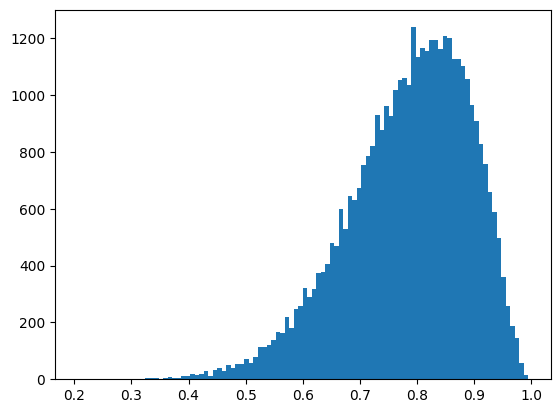

In [78]:
plt.hist(t, bins=100);

In [29]:
df = pd.read_csv("scores245_rc.csv")
df.head()

,ID,name,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,20240142,DORENBOS FLORIANNE DELA,1,1,1,1,1,NaN,NaN,NaN,...,1,1,1,1,0,1,1,1,1,1
1,20240245,SELIVANOVA YELYZAVETA,1,1,1,1,1,NaN,NaN,NaN,...,0,1,1,1,1,1,1,1,1,1
2,20241179,BOHLKE DANIELE,1,0,0,1,0,NaN,NaN,NaN,...,0,0,1,1,0,0,0,0,1,1
3,20241180,CHAN LAM,1,1,1,1,1,NaN,NaN,NaN,...,0,0,1,1,1,1,1,1,0,0
4,20241182,DIEP DAO NGOC,1,1,1,1,1,NaN,NaN,NaN,...,0,0,1,1,1,1,0,1,1,1


In [30]:
item_names = list(df.keys())
item_names.remove("ID")
item_names.remove("name")
item_names

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25']

In [31]:
df[item_names[0]]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    0
32    0
33    0
34    1
35    0
36    1
37    0
Name: 1, dtype: int64

In [66]:
long = []
for iid, iname in enumerate(item_names):
    for pid in range(len(df)):
        if np.isnan(df[iname][pid]) == False:
        #      st.id,            name,     person.id,  item.id,      response
            dd = [ str(df.ID[pid]),  df.name[pid],   pid + 1,  iid + 1,  int(df[iname][pid]) ]
            long.append(dd)
#
long = pd.DataFrame(long, columns=["st.id", "name", "person.id", "item.id", "response"])
# long.to_csv(longfilename)

In [68]:
long.loc[200:220]

,st.id,name,person.id,item.id,response
200,20241049,RUAN JIAN,38,5,0
201,20241049,RUAN JIAN,38,5,0
202,20241049,RUAN JIAN,38,5,0
203,20241049,RUAN JIAN,38,5,0
204,20241049,RUAN JIAN,38,5,0
205,20241049,RUAN JIAN,38,5,0
206,20241049,RUAN JIAN,38,5,0
207,20241049,RUAN JIAN,38,5,0
208,20241049,RUAN JIAN,38,5,0
209,20241049,RUAN JIAN,38,5,0


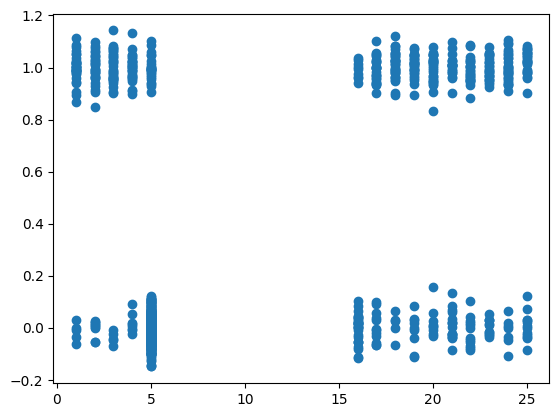

In [62]:
plt.scatter(long["item.id"], long["response"] + np.random.randn(len(long))*.05)

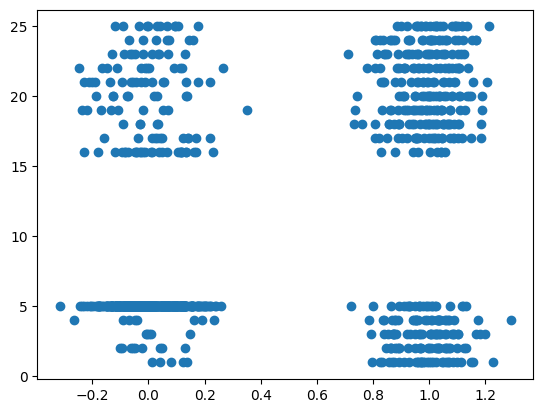

In [60]:
plt.scatter(long["response"] + np.random.randn(len(long)) * .1, long["item.id"])

In [64]:
import os
os.path.split("./help.csv")

('.', 'help.csv')